In [8]:
##Now it's time to start using BeautifulSoup to scrape HTMLS.
##I'll import requests, urllib.request, and BeautifulSoup

import requests
import urllib.request
from bs4 import BeautifulSoup

In [9]:
##I'll read the csv file I made last time with the url addresses using pandas:

import pandas as pd
url_c=pd.read_csv("C:/Users/maya rowen/Downloads/url.csv")

url_c

,0
0,http://www.nhl.com/scores/htmlreports/20172018...
1,http://www.nhl.com/scores/htmlreports/20172018...
2,http://www.nhl.com/scores/htmlreports/20172018...
3,http://www.nhl.com/scores/htmlreports/20172018...
4,http://www.nhl.com/scores/htmlreports/20172018...
...,...
3225,http://www.nhl.com/scores/htmlreports/20192020...
3226,http://www.nhl.com/scores/htmlreports/20192020...
3227,http://www.nhl.com/scores/htmlreports/20192020...
3228,http://www.nhl.com/scores/htmlreports/20192020...


In [10]:
##Now I can start writing functions that take a specific piece of
##information from an html page specific to each game. The BeautifulSoup html_parser will return the content of a 
##selected page, as organized by tag:

##Here is an example of what the game 1 boxscore looks like from the perspective of BeautifulSoup:

game1=url_c.iloc[0][0] ##The first URL isolated from the dataframe
response=requests.get(game1) ##accessing the url
soup=BeautifulSoup(response.text, "html.parser") ##the HTML code 
soup.contents ##displaying the code


[<html>
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <title>Game Summary</title>
 </head>
 <style type="text/css">
 				@media screen
 				{
 				     .print-class { display: block;}
 				}
 				@media print
 				{
 				     .print-class { display: none;}
 				}
 
 				p, td {font-family: arial,verdana; font-size: 10px;}
 				body {margin: 0; border:solid; border-width: 0;}
 				.title {fon-weight:bold;font-size:14px;}
 				.tablewidth{width: 650px;}
 				.columnwidth{width: 320px;}
 				.sectionheading{font-weight:bold;}
 				.visitorsectionheading{font-weight:bold;background-color: #E7E7E7;color:#000000;}
 				.homesectionheading{font-weight:bold;background-color: #E7E7E7;color:#000000;}
 				.teamHeading{font-weight:bold;font-size:14px;}
 				.heading {font-weight:bold}
 				.totalRow{font-size:10px;font-weight:bold;}
 				.bold{font-weight:bold;}
 				.border {border:1px solid black;border-collapse: collapse;}
 				.noborder {border:0px solid black

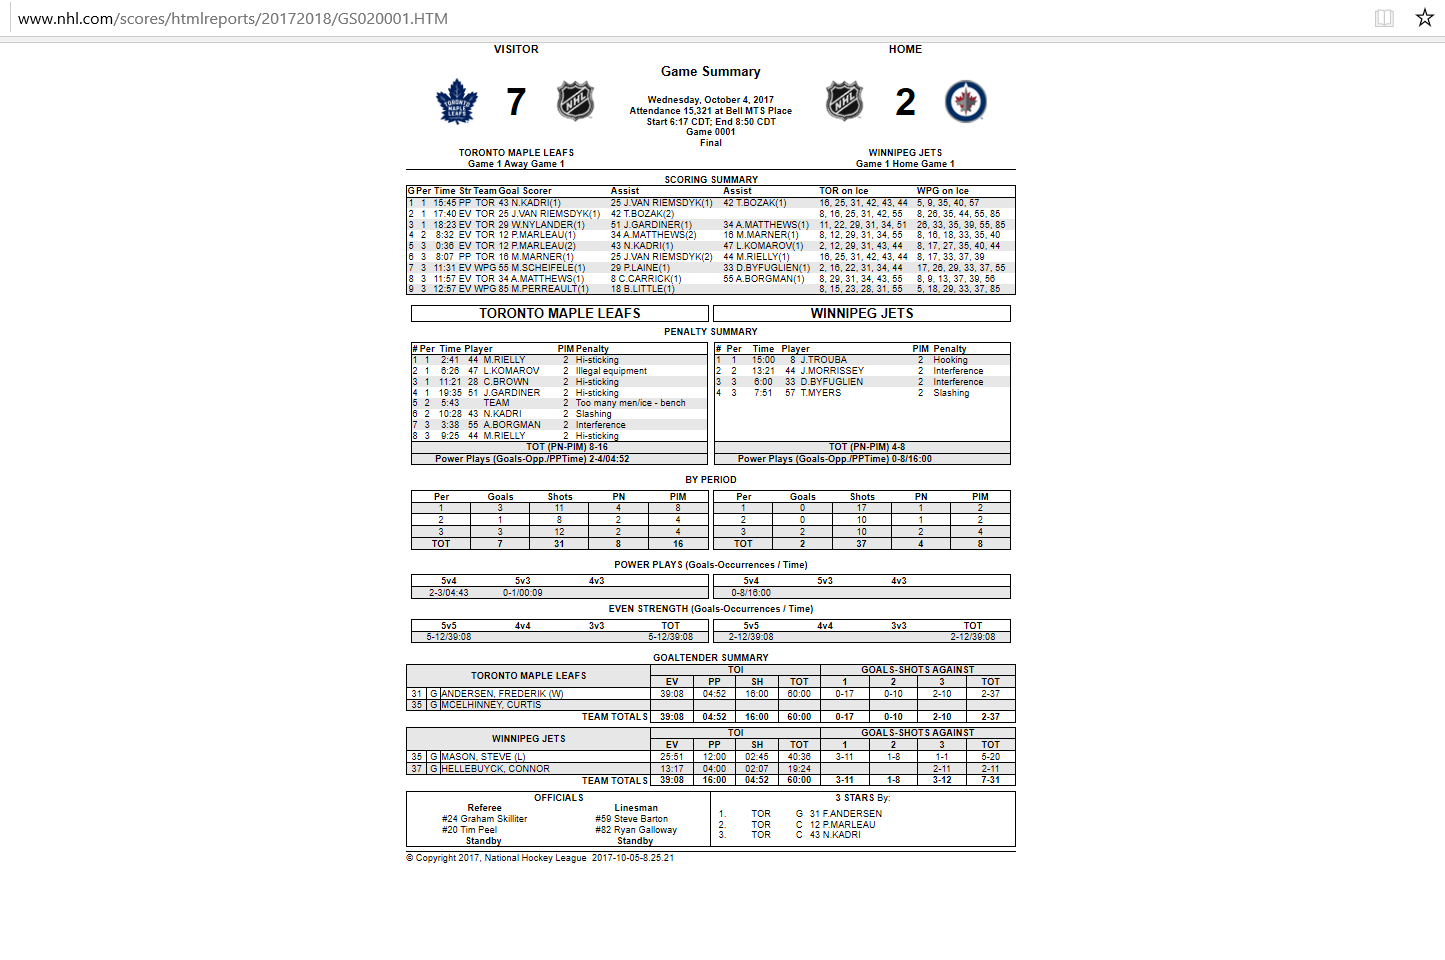

In [13]:
##That's a lot....

##We see the entire contents of the html file. It looks overwhelming. 
##To put it into perspective, below is a screenshot of the actual webpage:

from IPython.display import Image
PATH = "/Users/maya rowen/Pictures/"
Image(filename = PATH + "game1 (2).png", width=900, height=900)

In [12]:
##Notice that the data in the boxscore is largely organized by table. That means that it will be useful to ask
##BeautifulSoup to return contents in desired <table>. Below, I ask for the contents of the first table

##[tables are numbered ascending from top to bottom, left to right]:

soup.table.contents[0]

'\n'

In [15]:
##not much to see here.

##How about the second table....

soup.table.contents[1]

<tr>
<td align="center" width="100%">
<table border="0" cellpadding="0" cellspacing="0" id="StdHeader" width="100%">
<tr>
<td align="center">
<table align="center" border="0" cellpadding="0" cellspacing="0" width="100%" xmlns:ext="urn:schemas-microsoft-com:xslt">
<tr>
<td valign="top">
<table align="center" border="0" cellpadding="0" cellspacing="0" id="Visitor">
<tr>
<td align="center" style="font-size: 12px;font-weight:bold">VISITOR</td>
</tr>
<tr>
<td>
<table align="center" border="0" cellpadding="4" cellspacing="20">
<tr>
<td align="center"><img alt="TORONTO MAPLE LEAFS" border="0" height="50" src="http://www.nhl.com/scores/htmlreports/images/logoctor.gif" width="50"/></td>
<td align="center" style="font-size: 40px;font-weight:bold">7</td>
<td align="center"><img border="0" height="50" src="http://www.nhl.com/scores/htmlreports/images/logocnhl.gif" width="50"/></td>
</tr>
</table>
</td>
</tr>
<tr>
<td align="center" style="font-size: 10px;font-weight:bold">TORONTO MAPLE LEAFS<br/>G

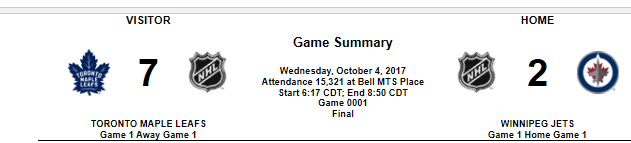

In [16]:
##And this is what we see on the webpage:

PATH = "/Users/maya rowen/Pictures/"
Image(filename = PATH + "table2.png", width=900, height=900)

In [17]:
#There's a lot more content in the second table. This is actually the html code for the header.

##<tr> indicates a table row, and <td> indicates a table cell.

##A lot of the code in the html is there to format and stylize the page......I'm interested in the actual text content.

soup.table.contents[1].get_text()

'\n\n\n\n\n\n\n\n\n\nVISITOR\n\n\n\n\n\n\n7\n\n\n\n\n\n\nTORONTO MAPLE LEAFSGame 1 Away Game 1\n\n\n\n\n\n\nGame Summary\n\n\n\xa0\n\n\n\n\n\nWednesday, October 4, 2017\n\n\nAttendance 15,321\xa0at\xa0Bell MTS Place\n\n\nStart\xa06:17\xa0CDT; End\xa08:50\xa0CDT\n\n\nGame 0001\n\n\nFinal\n\n\n\n\n\n\nHOME\n\n\n\n\n\n\n2\n\n\n\n\n\n\nWINNIPEG JETSGame 1 Home Game 1\n\n\n\n\n\n\n\n\n\n'

In [18]:
##In this html, much of the content-related (i.e. non-heading) text is in bold 10px font. 

##To narrow down the the text content more, I can command BeautifulSoup to return only text that meets the criteria

## "style="font-size: 10px;font-weight:bold"

##I'll use findAll to do so:


table2=soup.table.contents[1]
table2_10px=table2.findAll(style="font-size: 10px;font-weight:bold")
table2_10px

[<td align="center" style="font-size: 10px;font-weight:bold">TORONTO MAPLE LEAFS<br/>Game 1 Away Game 1</td>,
 <td align="center" style="font-size: 10px;font-weight:bold"></td>,
 <td align="center" style="font-size: 10px;font-weight:bold">Wednesday, October 4, 2017</td>,
 <td align="center" style="font-size: 10px;font-weight:bold">Attendance 15,321 at Bell MTS Place</td>,
 <td align="center" style="font-size: 10px;font-weight:bold">Start 6:17 CDT; End 8:50 CDT</td>,
 <td align="center" style="font-size: 10px;font-weight:bold">Game 0001</td>,
 <td align="center" style="font-size: 10px;font-weight:bold">Final</td>,
 <td align="center" style="font-size: 10px;font-weight:bold">WINNIPEG JETS<br/>Game 1 Home Game 1</td>]

In [19]:
##Lots of good info there.....We see a list of table cells that each contain a piece of information about the game.

##for instance, the first cell give the visiting team and number of games/away games they've played:

table2_10px[0]

<td align="center" style="font-size: 10px;font-weight:bold">TORONTO MAPLE LEAFS<br/>Game 1 Away Game 1</td>

In [20]:
##Here's the isolated text content

table2_10px_text=table2_10px[0].get_text()
table2_10px_text

'TORONTO MAPLE LEAFSGame 1 Away Game 1'

In [26]:
##The visiting team in the very first game of the season was the Ottawa Senators

##Finally, if I only want the team name, I use regex to split the string at the substring 'Game'....

import re

##...since all the text info I care about comes before that substring.

visiting_team_info=re.split("Game",table2_10px_text)
visiting_team_info

['TORONTO MAPLE LEAFS', ' 1 Away ', ' 1']

In [27]:
##Now that I have a list of substrings, I'll call the first element of the list, which is the visiting team:

visiting_team_info[0]

##And that's one way to locate and extract desired pieces of information from an HTML page. 

##It seems labor intensive, but in the next notebook, I'll extract data from all 3230 boxscores at once by iterating
##functions over my column of URLS....Bye for now!

'TORONTO MAPLE LEAFS'